2025-10-02

# 学習内容
### 書籍/教材:スッキリわかるPythonによる機械学習入門
### 範囲: 第7章 分類2:客船沈没事故での生存予測
### 目的:さらに複雑なデータを分析できるようにする

 -----------------------------
## <関数まとめ>

groupby(),pivot_table(),DecisionTreeClassifier(),get_dummies(),concat()

 -----------------------------
## <内容まとめ>  

・**不均衡データ**  
アヤメの種類を分類したとき正解データはそれぞれ50件ずつあったが、今回の場合、'Survived'が0のデータが549件、1のデータが342件と、0のデータ数が1のデータ数の1.6倍になっている。このように、正解データの比率に差があるデータを**不均衡データ**という。不均衡データの問題点として、**正解率を正しく評価できない点**が挙げられる。例えば、片方の正解データが全体の95パーセントを占める場合、モデルはすべて多数の方に分類するだけで、正解率が95パーセントになってしまう。  

・**不均衡データに対するモデルの作成**  
以下では、新たな引数としてclass_weight='balanced'を与えている。この引数を指定すると、決定木の条件分岐を考える際に、比率の大きいデータの影響を小さくして、反対に比率の小さいデータの影響を大きくする。これにより、予測性能の良いモデルが作れる可能性が高くなる。  
```python
model = tree.DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight = 'balanced')
```

・**過学習**  
 モデルの性能を評価したところ、正解率は約73％とあまり高くなかった。そこで、決定木を深くすれば予測性能が良くなるという仮説のもと、1~14までの深さでチューニングを行った。チューニングの際、訓練データと正解データのscoreを求めた。その結果、深さ6以降からテストデータの正解率が徐々に悪くなり、訓練データのほうは決定木が深くなるほど正解率が高くなっていくという結果が得られた。このような現象のことを**過学習**と呼ぶ。  
 モデルは必要以上に複雑にすると、訓練データのとても細かい（必要以上の）特徴をも法則として学習してしまう。その細かい特徴が、未知のテストデータにもあてはまれば問題ないが、だいたいあてはまらない。このように、モデルを必要以上に複雑にするとテストデータの予測性能が低下してしまう過学習が起こる。  
 決定木分析では木の深さを、重回帰分析では特徴量の列を増やしすぎると過学習が起こりやすくなることが知られている。  
 過学習を防ぐには以下の方法が考えられる。  
1.データ数を増やす。  
2.データの前処理の方法を変える。  
3.モデルの学習時の設定を変える。  
4.そもそも分析手法を変える。  

・**基準軸**  
今回、欠損値のある行を除いたすべてのデータでAge列の平均値を計算し、埋めた。しかし、データを小グループごとにまとめると、Age列の分布が大きく異なる可能性がある。なお、小グループに分ける際の基準となる列を、**基準軸**と呼ぶ。

・**小グループ作成の基準となる列を指定**  
groupby('Survived')で基準軸をSurvived列として設定する。  
```python
df2.groupby('Survived')['Age'].mean()
```

・**ピボットテーブル機能によるクロス集計**  
先ほどのコードで、Survived列に対する平均年齢を求めたが、結果だけでは分布に差があるのかわからなかった。同様にしてPclass列に対する平均年齢をもとめたところ、グループごとに分布に差がありそうであることが分かった。そこで、Survived列とPclass列の二つの列を基準軸として平均年齢の集計を行うことにした。この2列を使った集計のことを、**クロス集計**という。  
以下が、pivot_table関数によってピボットテーブルを作成するコードである。ここでaggfuncとは統計量を指定する引数であり、デフォルトでは平均値が指定されている。  

```python
pd.pivot_table(df2, index = 'Survived', columns = 'Pclass', values = 'Age', aggfunc = 'mean')
```

・**get_dummies関数による文字列の数字列への変換**  
今までは数値データにのみ注目してきたが、性別による生存率を確認したところ、女性のほうが圧倒的に生存率が高いことが分かった。そこで特徴量にSex列を加え再学習させた。しかし、Sex列は文字列であり、文字列は特徴量として指定できない。そこで、get_dummies関数を使って文字列を数字列へ変換する。文字列を0と1の数値に変換することを、**ダミー変数化**または**ワンホットエンコーディング**という。  
```python
male = pd.get_dummies(df2['Sex'],drop_first = True, dtype = int)
```
ここでdrop_first=Trueとすることで、値の種類の数より1少ない列をダミー変数化して返している。(数値は0と1のみであり、片方が分かればもう片方もわかるため(male = 1であればfemale = 0である))

・**concat関数によるデータフレーム同士の連結**  
axis=1で横方向に連結(列を追加),axis=0で縦方向に連結(行を追加)。  
```python
x_temp = pd.concat([x,male], axis=1)
```

・**feature_importances_で特徴量重要度を確認**  
決定木では上にある条件分岐条件ほど、重要であると解釈される。  
scikit-learnの決定木分析では、それぞれの特徴量がどれくらい影響を与えるかを示す**特徴量重要度**という指標が存在し、モデルのfeature_importances_で表示できる。**値が大きいほど、その列が分類に与える影響が大きい。**  
```python
model.feature_importances_
```
データフレームに変換して表示する場合以下の通り。  
```python
pd.DataFrame(model.feature_importances_, index = x_new.columns)
```


 -----------------------------
## まとめ  

・欠損値を埋める場合、クロス集計を用いた小グループごとの値を用いると良い。  
・不均衡データであった場合class_weightを指定する。  
・モデルを複雑にしすぎると過学習が起きる場合がある。  
・文字列データを特徴量に加える場合、ダミー変数化する必要がある。  
・決定木では上にある条件分岐条件ほど重要である。  
・特徴量重要度により、各特徴量がどれほど分類に影響を及ぼしているかが分かる。  
・特徴量重要度は0~1の値をとり、大きい値であるほど、影響が強いと解釈できる。  


--------------------------------------
## 以下は実装例  

In [17]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
df = pd.read_csv('chap07/Survived.csv')
df.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S


In [18]:
# 生き残った人と生き残らなかった人の総数を確認
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df.shape

(891, 11)

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [22]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [23]:
col = ['Pclass','Age','SibSp','Parch','Fare']
x = df[col]
t = df['Survived']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)
x_train.shape

(712, 5)

In [25]:
model = tree.DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight = 'balanced')
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [26]:
model.score(x_test,y_test)

0.7374301675977654

正解率が73％と低いため、ここからモデルのチューニングを行っていく。

In [35]:
def learn(x, t, depth=3):
    x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)
    model = tree.DecisionTreeClassifier(max_depth = depth, random_state = 0, class_weight = 'balanced')
    model.fit(x_train, y_train)
    score = model.score(x_train,y_train)
    score2 = model.score(x_test,y_test)
    return round(score, 3), round(score2, 3), model

In [36]:
for j in range(1,15):
    train_score , test_score, model = learn(x, t, depth = j)
    sentence = '訓練データの正解率{}'
    sentence2 = 'テストデータの正解率{}'
    total_sentence='深さ{}:'+sentence+sentence2
    print(total_sentence.format(j,train_score,test_score))

深さ1:訓練データの正解率0.659テストデータの正解率0.704
深さ2:訓練データの正解率0.699テストデータの正解率0.732
深さ3:訓練データの正解率0.704テストデータの正解率0.737
深さ4:訓練データの正解率0.698テストデータの正解率0.726
深さ5:訓練データの正解率0.722テストデータの正解率0.737
深さ6:訓練データの正解率0.77テストデータの正解率0.698
深さ7:訓練データの正解率0.771テストデータの正解率0.648
深さ8:訓練データの正解率0.781テストデータの正解率0.631
深さ9:訓練データの正解率0.83テストデータの正解率0.704
深さ10:訓練データの正解率0.851テストデータの正解率0.687
深さ11:訓練データの正解率0.878テストデータの正解率0.676
深さ12:訓練データの正解率0.892テストデータの正解率0.654
深さ13:訓練データの正解率0.909テストデータの正解率0.654
深さ14:訓練データの正解率0.92テストデータの正解率0.654


In [37]:
# 正解率を上げるために、欠損値を平均値ではなく中央値で埋めたほうがいいのではないかという仮説
df2 = pd.read_csv('chap07/Survived.csv')
print(df2['Age'].mean())
print(df2['Age'].median())

29.69911764705882
28.0


上記よりあまり数値に差がないため違いそう。

In [38]:
df2.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [39]:
df2.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [40]:
pd.pivot_table(df2, index = 'Survived', columns = 'Pclass', values = 'Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [41]:
is_null = df2['Age'].isnull()
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 0) & (is_null), 'Age'] = 43
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 1) & (is_null), 'Age'] = 35

df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 0) & (is_null), 'Age'] = 33
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 1) & (is_null), 'Age'] = 25

df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 0) & (is_null), 'Age'] = 26
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 1) & (is_null), 'Age'] = 20

In [42]:
# 欠損値を小グループごとの平均値で埋めた後の再評価
col = ['Pclass','SibSp','Age','Parch','Fare']
x = df2[col]
t = df2['Survived']

for j in range(1,15):
    s1, s2, m = learn(x, t, depth = j)
    sentence = '深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(sentence.format(j, s1, s2))


深さ1:訓練データの精度0.659::テストデータの精度0.704
深さ2:訓練データの精度0.699::テストデータの精度0.67
深さ3:訓練データの精度0.722::テストデータの精度0.715
深さ4:訓練データの精度0.74::テストデータの精度0.704
深さ5:訓練データの精度0.76::テストデータの精度0.726
深さ6:訓練データの精度0.794::テストデータの精度0.793
深さ7:訓練データの精度0.819::テストデータの精度0.749
深さ8:訓練データの精度0.84::テストデータの精度0.749
深さ9:訓練データの精度0.885::テストデータの精度0.743
深さ10:訓練データの精度0.906::テストデータの精度0.732
深さ11:訓練データの精度0.93::テストデータの精度0.726
深さ12:訓練データの精度0.947::テストデータの精度0.737
深さ13:訓練データの精度0.961::テストデータの精度0.732
深さ14:訓練データの精度0.969::テストデータの精度0.721


上記より、予測性能が向上していることが分かる。ここで目標を85％にして、再度チューニングを行う。
そこで今まで数値データのみ注目してきたが、性別データ('Sex')に注目する。

In [43]:
sex = df2.groupby('Sex')['Survived'].mean()
sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

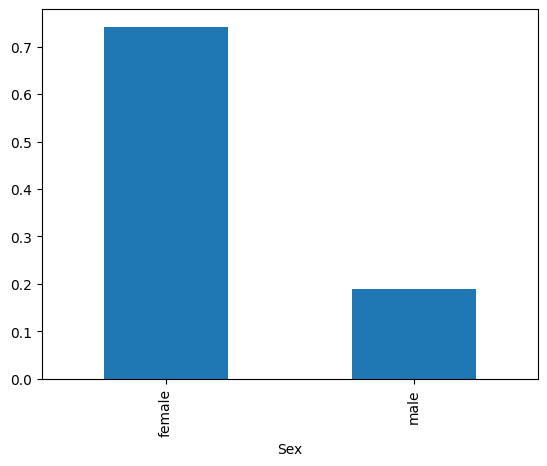

In [44]:
sex.plot(kind = 'bar')

以上より女性のほうが圧倒的に生存率が高いことが分かった。これよりSex列を特徴量として追加し、再学習を行う。

In [45]:
col = ['Pclass','Sex','SibSp','Age','Parch','Fare']
x = df2[col]
t = df2['Survived']

train_score,text_score,model = learn(x, t)

ValueError: could not convert string to float: 'female'

Sex列は文字列のためエラーが起きた。ここで数字データに変換する。

In [46]:
male = pd.get_dummies(df2['Sex'], drop_first = True, dtype = int)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [47]:
# データフレーム同士を連結
x_temp = pd.concat([x,male],axis = 1)

x_temp.head(3)

,Pclass,Sex,SibSp,Age,Parch,Fare,male
0,3,male,1,22.0,0,7.2500,1
1,1,female,1,38.0,0,71.2833,0
2,3,female,0,26.0,0,7.9250,0


In [48]:
x_new = x_temp.drop('Sex', axis = 1)
for j in range(1,15):
    s1, s2, m = learn(x_new, t, depth = j)
    s = '深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(s.format(j, s1, s2))
    

深さ1:訓練データの精度0.787::テストデータの精度0.788
深さ2:訓練データの精度0.792::テストデータの精度0.782
深さ3:訓練データの精度0.847::テストデータの精度0.81
深さ4:訓練データの精度0.854::テストデータの精度0.849
深さ5:訓練データの精度0.865::テストデータの精度0.86
深さ6:訓練データの精度0.876::テストデータの精度0.86
深さ7:訓練データの精度0.904::テストデータの精度0.866
深さ8:訓練データの精度0.914::テストデータの精度0.899
深さ9:訓練データの精度0.927::テストデータの精度0.888
深さ10:訓練データの精度0.945::テストデータの精度0.883
深さ11:訓練データの精度0.956::テストデータの精度0.827
深さ12:訓練データの精度0.972::テストデータの精度0.844
深さ13:訓練データの精度0.971::テストデータの精度0.849
深さ14:訓練データの精度0.979::テストデータの精度0.838


In [49]:
s1, s2, model = learn(x_new, t, depth = 5)

import pickle
with open('chap07/survived.pkl', 'wb') as f:
    pickle.dump(model, f)
    

In [50]:
# 特徴量重要度を表示
model.feature_importances_

array([0.12084767, 0.06266251, 0.25595808, 0.00275855, 0.05145686,
       0.50631633])

In [51]:
pd.DataFrame(model.feature_importances_, index = x_new.columns)

,0
Pclass,0.120848
SibSp,0.062663
Age,0.255958
Parch,0.002759
Fare,0.051457
male,0.506316
